In [1]:
import geopandas as gpd
import pandas as pd
import sys
sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv

In [2]:
# set the filepath and load in a shape
fp = "../datasets/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<AxesSubplot:>

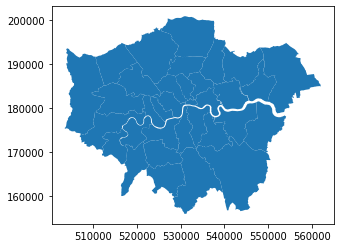

In [3]:
map_df.plot()

In [4]:
#df = pd.read_csv('datasets/london-borough-profile.csv', header=0)
#df = pd.read_csv(vv.LISTING_COMBINED_FILE,encoding="utf-8")
df = vv.quick_data(remove_duplicates=True,numeric_values_only=False,HOW='listings_only',publish=True)
df = vv.tidy_dataset(df)
df.head(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:350: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 17534/42614/37063/37535/16764 ==> 17534/33082/32879/32887/16764
dataframe length: 17534


,Description,Price,add_info,borough_name
ids,,,,
124711385,3 bedroom terraced house for sale,595000.0,"Added on 06/07/2022 by Keatons, Stratford",Newham
85192623,Studio flat for sale,100000.0,"Reduced on 18/06/2022 by Samuel King, Canning ...",Newham
122565191,1 bedroom flat for sale,105000.0,"Added on 19/04/2022 by Site Sales, Loughton",Newham
84048834,2 bedroom apartment for sale,106250.0,"Added on 18/10/2021 by Outlook, Docklands",Newham
85363035,2 bedroom apartment for sale,106250.0,Added on 31/05/2022 by Notting Hill Genesis,Newham
105275540,1 bedroom apartment for sale,106250.0,"Added on 09/04/2021 by Imagine Living, Watford",Newham
105267614,2 bedroom apartment for sale,107500.0,"Added on 09/04/2021 by Imagine Living, Watford",Newham
124353263,2 bedroom apartment for sale,108750.0,Added on 27/06/2022 by Notting Hill Genesis,Newham
121343795,1 bedroom apartment for sale,111150.0,Added on 21/03/2022 by Site Sales,Newham


In [5]:
df['Price'] = pd.to_numeric(df['Price'], 'coerce').dropna().astype(int)
df = df[df["Price"] <= 600000]
print(df.shape)
df.head()

(17448, 4)


,Description,Price,add_info,borough_name
ids,,,,
124711385,3 bedroom terraced house for sale,595000,"Added on 06/07/2022 by Keatons, Stratford",Newham
85192623,Studio flat for sale,100000,"Reduced on 18/06/2022 by Samuel King, Canning ...",Newham
122565191,1 bedroom flat for sale,105000,"Added on 19/04/2022 by Site Sales, Loughton",Newham
84048834,2 bedroom apartment for sale,106250,"Added on 18/10/2021 by Outlook, Docklands",Newham
85363035,2 bedroom apartment for sale,106250,Added on 31/05/2022 by Notting Hill Genesis,Newham


In [6]:
df.columns

Index(['Description', 'Price', 'add_info', 'borough_name'], dtype='object')

In [7]:
# those are really terrible column names. let's rename them to something simpler
score = df.rename(index=str, columns={"Station_Prox": "closeness_to_station",'bedrooms_model':'bedrooms','bathrooms_model':'bathrooms','tenure.tenureType':'tenureType'}
                                      )
score.head()

,Description,Price,add_info,borough_name
ids,,,,
124711385,3 bedroom terraced house for sale,595000,"Added on 06/07/2022 by Keatons, Stratford",Newham
85192623,Studio flat for sale,100000,"Reduced on 18/06/2022 by Samuel King, Canning ...",Newham
122565191,1 bedroom flat for sale,105000,"Added on 19/04/2022 by Site Sales, Loughton",Newham
84048834,2 bedroom apartment for sale,106250,"Added on 18/10/2021 by Outlook, Docklands",Newham
85363035,2 bedroom apartment for sale,106250,Added on 31/05/2022 by Notting Hill Genesis,Newham


In [8]:
score['Price'] = pd.to_numeric(score['Price'], 'coerce').fillna(-1).astype(int)

borough_property = score.groupby(['borough_name']).agg(mean_price=('Price',"mean"), median_price=('Price',"median"), total_properties=('Price','count'), min=('Price','min'), max=('Price','max'))
#borough_property = borough\
# _property.reset_index()
borough_property

,mean_price,median_price,total_properties,min,max
borough_name,,,,,
Barking and Dagenham,516042.287234,500000.0,94,475000,600000
Barnet,600000.000000,600000.0,94,600000,600000
Bexley,574928.265306,575000.0,196,550000,600000
City of London,600000.000000,600000.0,2,600000,600000
Croydon,457870.154865,450000.0,1737,375000,600000
Ealing,465849.419228,460000.0,1269,240000,600000
Enfield,532898.771562,525000.0,429,475000,600000
Greenwich,486660.959114,480000.0,587,425000,600000
Havering,479060.111524,500000.0,538,425000,600000


In [9]:
# join the geodataframe with the cleaned up csv dataframe
#merged = map_df.set_index('NAME').join(borough_property.set_index('borough_name'))
merged = map_df.set_index('NAME').join(borough_property)

print(merged.shape)
merged

(33, 12)


,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,mean_price,median_price,total_properties,min,max
NAME,,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",405380.855940,400000.0,1069.0,108000.0,600000.0
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",457870.154865,450000.0,1737.0,375000.0,600000.0
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",NaN,NaN,NaN,NaN,NaN
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",378186.829727,375000.0,1063.0,150000.0,600000.0
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",465849.419228,460000.0,1269.0,240000.0,600000.0
Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",479060.111524,500000.0,538.0,425000.0,600000.0
Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",501502.343284,500000.0,469.0,350000.0,600000.0
Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",NaN,NaN,NaN,NaN,NaN
Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",NaN,NaN,NaN,NaN,NaN


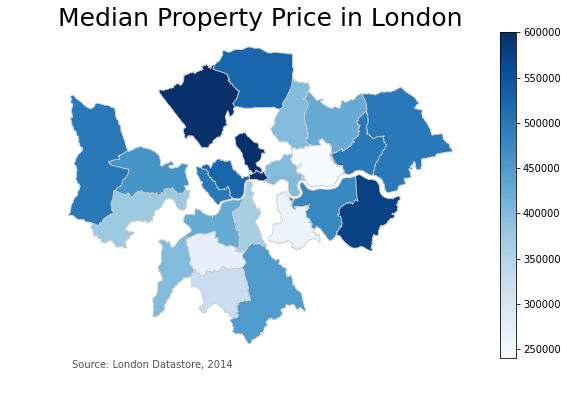

In [10]:
from matplotlib import pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
variable = 'median_price'

# set the range for the choropleth
#vmin, vmax = 120, 220
vmin, vmax = merged[variable].min(), merged[variable].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Median Property Price in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap_median_price.png', dpi=300)

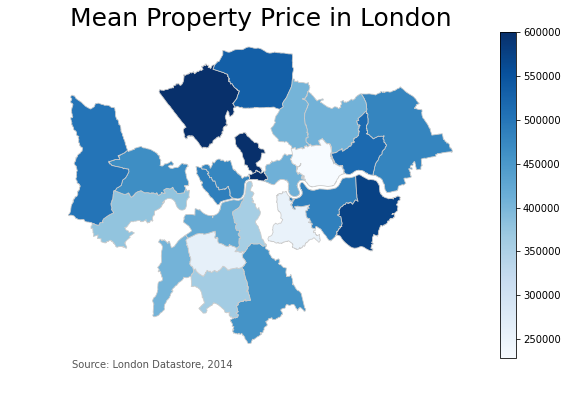

In [11]:
from matplotlib import pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
variable = 'mean_price'

# set the range for the choropleth
#vmin, vmax = 120, 220
vmin, vmax = merged[variable].min(), merged[variable].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Mean Property Price in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap_mean_price.png', dpi=300)

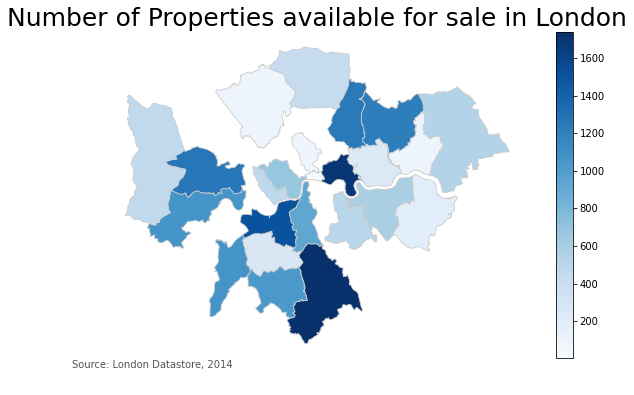

In [12]:
from matplotlib import pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
variable = 'total_properties'

# set the range for the choropleth
#vmin, vmax = 120, 220
vmin, vmax = merged[variable].min(), merged[variable].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Number of Properties available for sale in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap_total_properties.png', dpi=300)

